# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [8]:
df = pd.read_csv('/content/Dataset of Diabetes .csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
# Memahami struktur data
df.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [11]:
print(f"Jumlah kolom dataset: {df.columns.size} kolom.")
print(f"Jumlah baris dataset: {df.index.size} baris.")

Jumlah kolom dataset: 14 kolom.
Jumlah baris dataset: 1000 baris.


In [12]:
# Menangani Data yang Hilang
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [13]:
df.dropna(inplace=True)
print(df.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [14]:
# Analisis Distribusi dan Korelasi
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


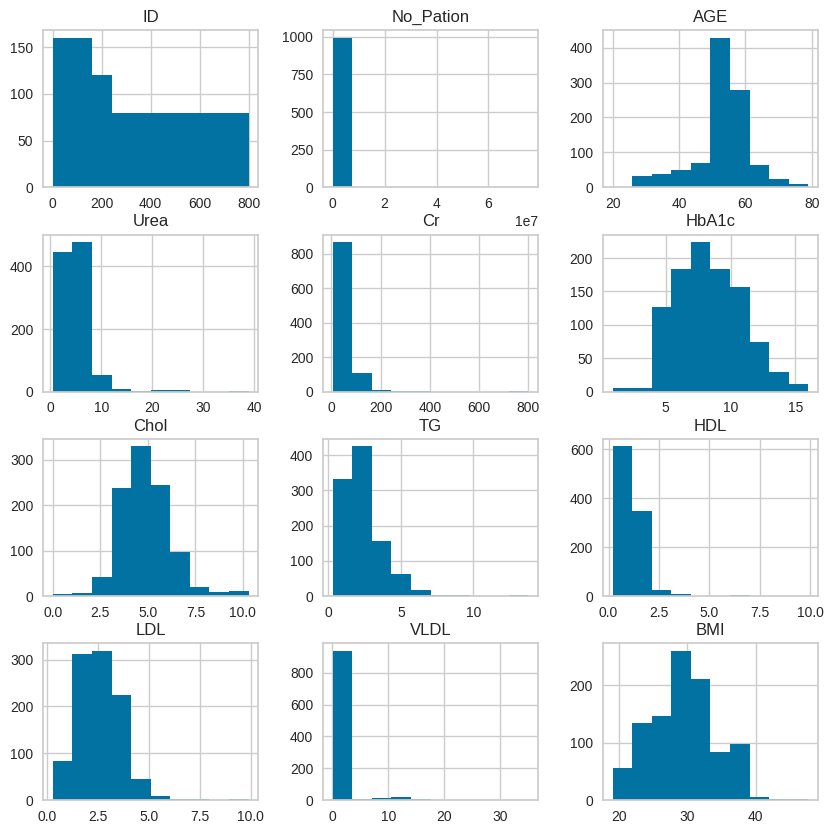

In [15]:
df.hist(figsize=(10, 10))
plt.show()

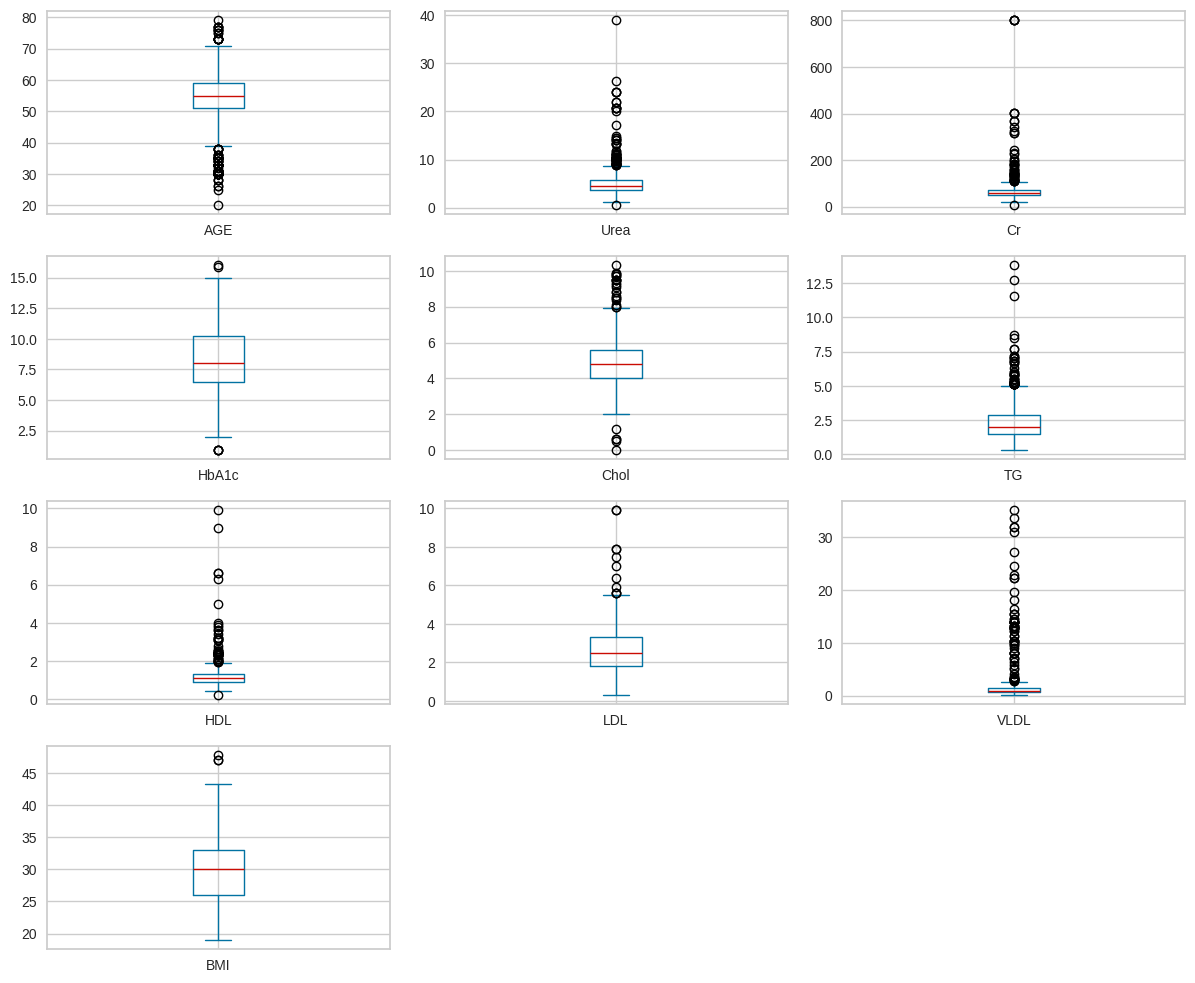

In [19]:
numeric_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
df[numeric_columns].plot(kind='box', subplots=True, layout=(4, 3), figsize=(12, 10))
plt.tight_layout()
plt.show()

In [20]:
correlation_matrix = df.corr(numeric_only=True)

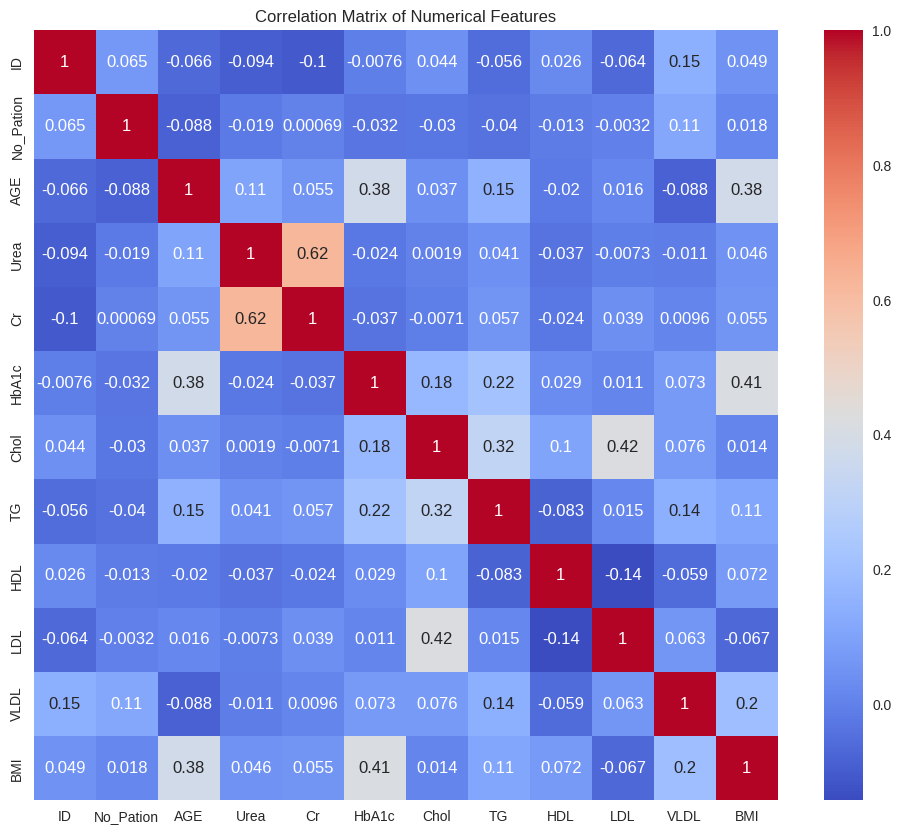

In [21]:
# Visualisasi Data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

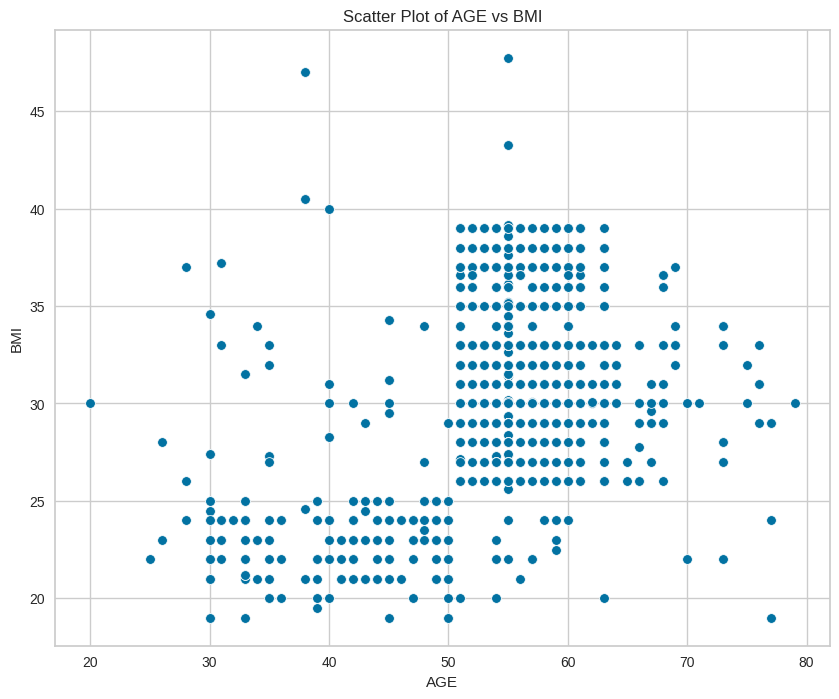

In [24]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='AGE', y='BMI', data=df)
plt.title('Scatter Plot of AGE vs BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')
plt.show()

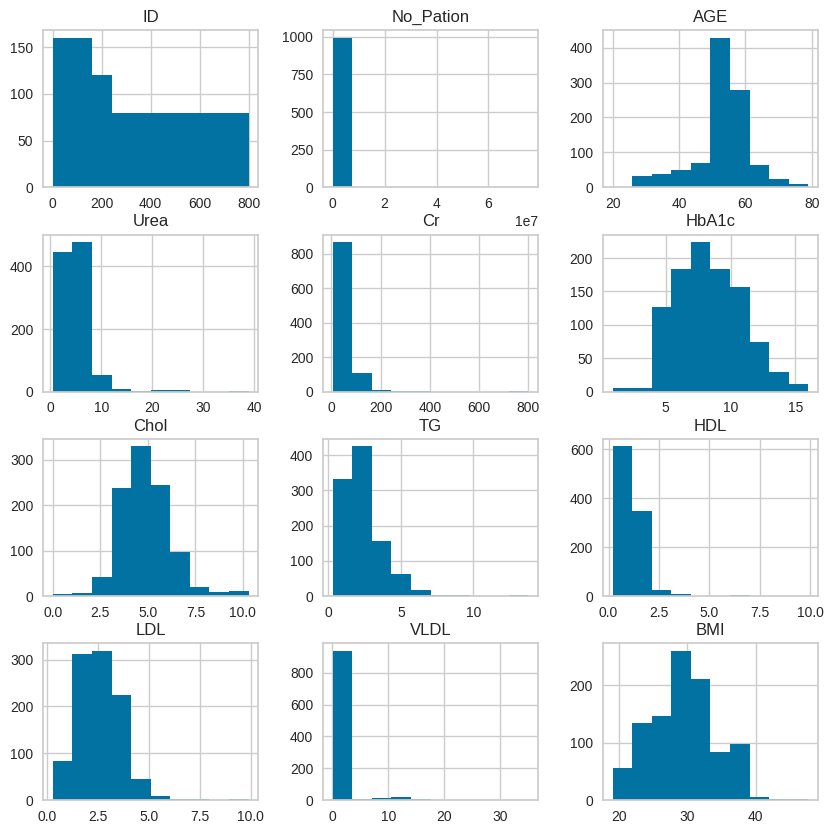

In [25]:
df.hist(figsize=(10, 10))
plt.show()

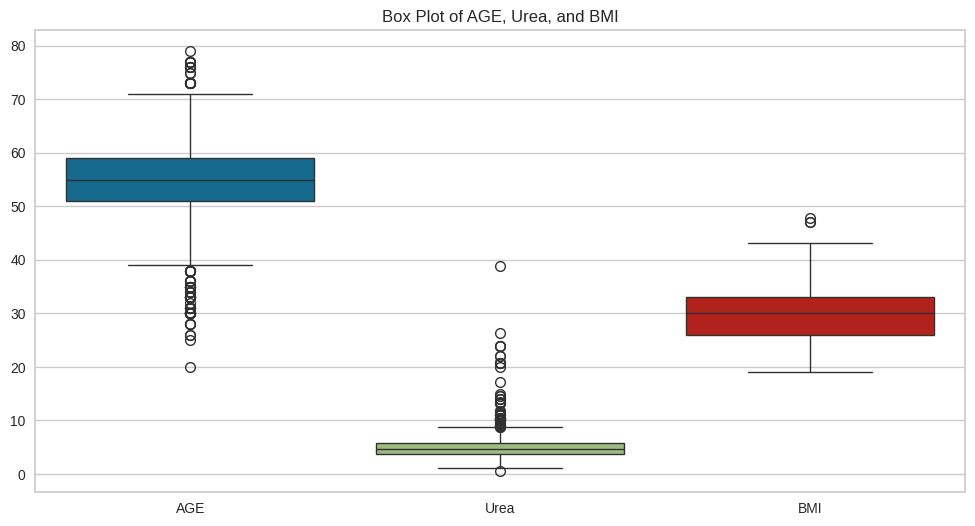

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['AGE', 'Urea', 'BMI']])
plt.title('Box Plot of AGE, Urea, and BMI')
plt.show()

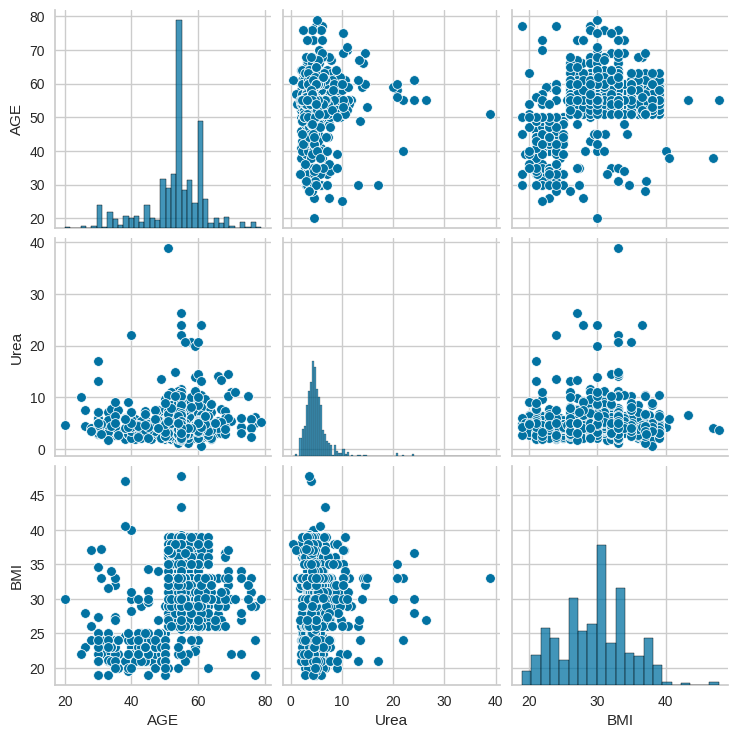

In [27]:
selected_columns = ['AGE', 'Urea', 'BMI']

sns.pairplot(df[selected_columns])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [28]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['CLASS'] = label_encoder.fit_transform(df['CLASS'])

In [29]:
features_to_scale = ['AGE', 'Urea', 'Cr', 'HbA1c', 'BMI']
scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0
1,735,34221,1,-3.130017,-0.212954,-0.115804,-1.334983,3.7,1.4,1.1,2.1,0.6,-1.326239,0
2,420,47975,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0
3,680,87656,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0
4,504,34223,1,-2.334096,0.673299,-0.382672,-1.334983,4.9,1.0,0.8,2.0,0.4,-1.729472,0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [30]:

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df)
df['Cluster'] = kmeans.labels_

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Cluster
0,502,17975,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0,0
1,735,34221,1,-3.130017,-0.212954,-0.115804,-1.334983,3.7,1.4,1.1,2.1,0.6,-1.326239,0,0
2,420,47975,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0,0
3,680,87656,0,-0.401144,-0.144781,-0.382672,-1.334983,4.2,0.9,2.4,1.4,0.5,-1.124622,0,0
4,504,34223,1,-2.334096,0.673299,-0.382672,-1.334983,4.9,1.0,0.8,2.0,0.4,-1.729472,0,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [31]:

silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.994196656987982


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

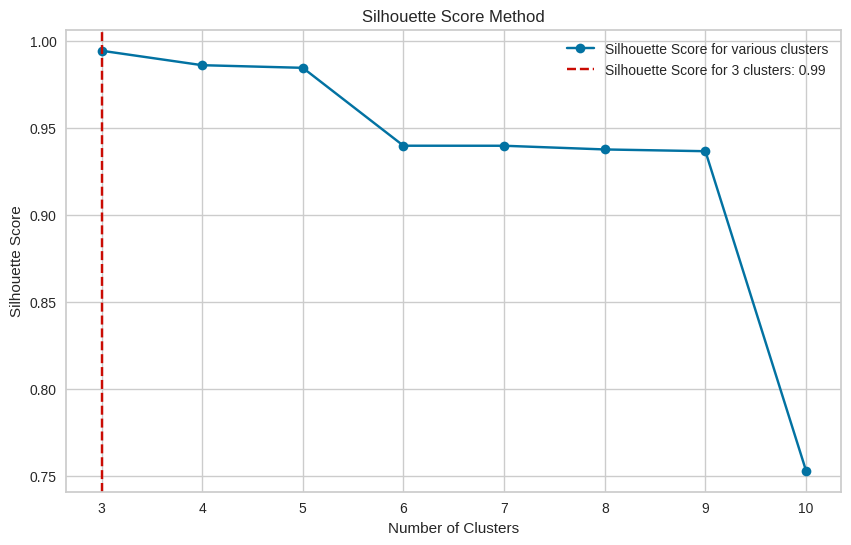

In [43]:
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score for various clusters')
plt.axvline(x=3, color='r', linestyle='--', label=f"Silhouette Score for 3 clusters: {silhouette_scores[0]:.2f}")
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

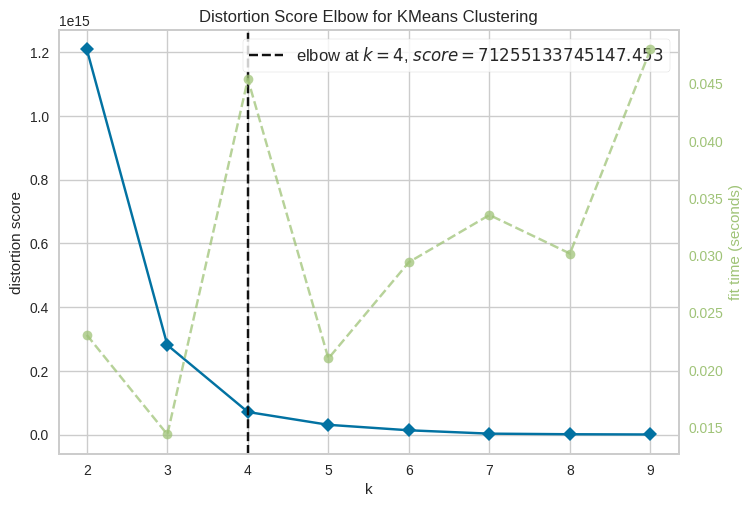

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:

visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.show()

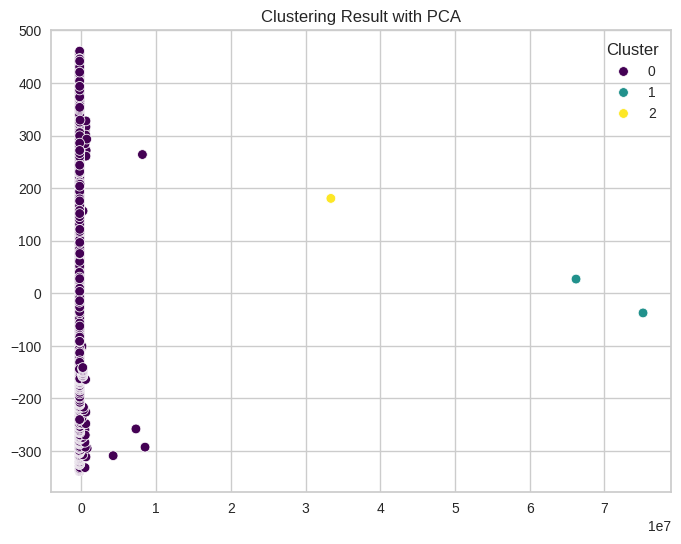

In [49]:

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [62]:
for class_label in df['CLASS'].unique():
    class_data = df[df['CLASS'] == class_label]
    print(f"\nKarakteristik CLASS {class_label}:")
    print(class_data.describe())  # Statistik deskriptif

    # Contoh analisis tambahan
    print(f"Rata-rata BMI di CLASS {class_label}: {class_data['BMI'].mean()}")



Karakteristik CLASS 0:
               ID     No_Pation      Gender         AGE        Urea  \
count  102.000000  1.020000e+02  102.000000  102.000000  102.000000   
mean   367.598039  8.235148e+05    0.372549   -1.049920   -0.156143   
std    261.853079  7.462301e+06    0.485871    1.073875    0.861068   
min      7.000000  1.168000e+03    0.000000   -3.243720   -1.065121   
25%    139.500000  3.424525e+04    0.000000   -1.651878   -0.621994   
50%    265.500000  3.429450e+04    0.000000   -1.083362   -0.247041   
75%    647.500000  4.542850e+04    1.000000   -0.401144    0.085304   
max    799.000000  7.543566e+07    1.000000    2.668838    5.752214   

               Cr       HbA1c        Chol          TG         HDL         LDL  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    -0.105829   -1.472400    4.266667    1.624510    1.230392    2.623529   
std      0.501995    0.364406    1.284356    1.030374    0.515846    0.986059   
min     -1.0

Tulis hasil interpretasinya di sini.
1. Cluster 1:
<p> Karakteristik Utama:
<p>AGE: Rata-rata usia negatif (-1.05) menunjukkan kelompok ini cenderung lebih muda.
<p>Urea: Rata-rata sedikit di bawah nol (-0.16), menunjukkan fungsi ginjal yang relatif stabil.
<p>Cr (Kreatinin): Rata-rata mendekati nol (-0.11), mengindikasikan kesehatan ginjal yang baik.
<p>HbA1c: Nilai rata-rata rendah (-1.47), menunjukkan kontrol glukosa yang sangat baik.
<p>Chol (Kolesterol): Rata-rata cukup tinggi (4.27), tetapi masih dalam rentang normal.
<p>BMI: Rata-rata sangat rendah (-1.46), mengindikasikan kelompok ini cenderung kurus.
<p>Interpretasi: CLASS 0 merepresentasikan individu dengan kesehatan metabolik baik, usia muda, dan kemungkinan pola hidup aktif. Potensi risiko metabolik rendah.
2. Cluster 2:
<p>Karakteristik Utama:
<p>AGE: Usia sedikit lebih tua dibanding CLASS 1 (-1.16).
<p>HbA1c: Lebih tinggi dari CLASS 0 dan CLASS 1 (-0.90), tetapi masih dalam kontrol glukosa yang cukup baik.
<p>BMI: Rata-rata lebih tinggi dibanding CLASS 1 (-1.14), tetapi tetap kurus.
<p>Kolesterol dan TG: Lebih tinggi dari CLASS 0 dan CLASS 1, menunjukkan sedikit risiko metabolik lebih tinggi.
<p>Interpretasi: CLASS 2 mencerminkan individu yang lebih tua dengan kontrol glukosa cukup baik namun dengan potensi risiko kolesterol lebih tinggi.
3. Cluster 3:
  <p>Karakteristik Utama:
<p>AGE: Usia rata-rata positif (0.21), menunjukkan kelompok ini terdiri dari individu dewasa.
<p>HbA1c: Positif (0.24), mengindikasikan kontrol glukosa yang kurang baik dibandingkan kelas lain.
<p>Kolesterol dan TG: Rata-rata tinggi (4.96 dan 2.46), mencerminkan risiko metabolik lebih besar.
<p>BMI: Mendekati normal (0.25), mengindikasikan kelompok ini berada di kategori berat badan ideal.
<p>Interpretasi: CLASS 3 mencakup individu dewasa dengan risiko metabolik lebih tinggi. Intervensi kesehatan diperlukan untuk menurunkan kadar gula darah dan kolesterol.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [63]:

df.to_csv('hasil_clustering.csv', index=False)